<a href="https://colab.research.google.com/github/manasakoduri/IT496-A5/blob/main/ManasaK_A5_DuPont_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

import json

from tabulate import tabulate


myAPIKey = '03bedf13ef53897de1454ac4df93b058'

stock = 'ADBE'

balanceStatements = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}').json()
incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()

print('Balance Statements')
print(tabulate(balanceStatements))
print('Income Statements')
print(tabulate(incomeStatements))


Balance Statements
----------  ----  ---  ----------  ----------  -------------------  ----  --  ----------  ----------  ----------  ----------  -  ---------  ----------  ----------  -----------  ----------  -----------  -  -----------  ----------  -----------  -  -----------  ---------  -----------  ---------  ----------  ----------  ----------  ----------  ---------  -----------  ---------  ----------  -  --------  -----------  -  -----  -----------  ----------  ------------  -----------  -----------  ------  -----------  -----------  -  ----------  ----------  ------------------------------------------------------------------------------------------------  -----------------------------------------------------------------------------------
2021-12-03  ADBE  USD  0000796343  2022-01-21  2022-01-21 16:03:34  2021  FY  3844000000  1954000000  5798000000  1878000000  0  993000000  8669000000  2116000000  12668000000  1820000000  14488000000  0  1.085e+09     883000000  18572000000  0  27

In [ ]:
profitablity = []
assetTurnOver = []
capitalStructure = []
returnOnEquity = []

dates=[]

for i in range (0,len(incomeStatements)):
    dates.append(balanceStatements[i]['date'])
    profitabilityValue=incomeStatements[i]['netIncome']/incomeStatements[i]['revenue']
    profitablity.append(profitabilityValue)
    assetTurnOverValue=incomeStatements[i]['revenue']/balanceStatements[i]['totalAssets']
    assetTurnOver.append(assetTurnOverValue)
    capitalStructureValue=balanceStatements[i]['totalAssets']/balanceStatements[i]['totalStockholdersEquity']
    capitalStructure.append(capitalStructureValue)
    returnOnEquityValue= profitabilityValue*assetTurnOverValue*capitalStructureValue
    returnOnEquity.append(returnOnEquityValue)

print(returnOnEquity)

[0.3258768669324863, 0.39656212303980704, 0.2802862825855839, 0.2767295933375731, 0.20023406981833877]


In [ ]:
DuPontAnalysisdf= pd.DataFrame(columns=['profitablity', 'assetTurnOver','capitalStructure','returnOnEquity','date'])

DuPontAnalysisdf['profitablity']=profitablity
DuPontAnalysisdf['assetTurnOver']=assetTurnOver
DuPontAnalysisdf['capitalStructure']=capitalStructure
DuPontAnalysisdf['returnOnEquity']=returnOnEquity
DuPontAnalysisdf['date']=dates
print(DuPontAnalysisdf)

   profitablity  assetTurnOver  capitalStructure  returnOnEquity        date
0      0.305480       0.579457          1.840981        0.325877  2021-12-03
1      0.408766       0.529896          1.830820        0.396562  2020-11-27
2      0.264200       0.538054          1.971709        0.280286  2019-11-29
3      0.286907       0.481121          2.004748        0.276730  2018-11-30
4      0.232001       0.502305          1.718230        0.200234  2017-12-01


DuPont Analysis


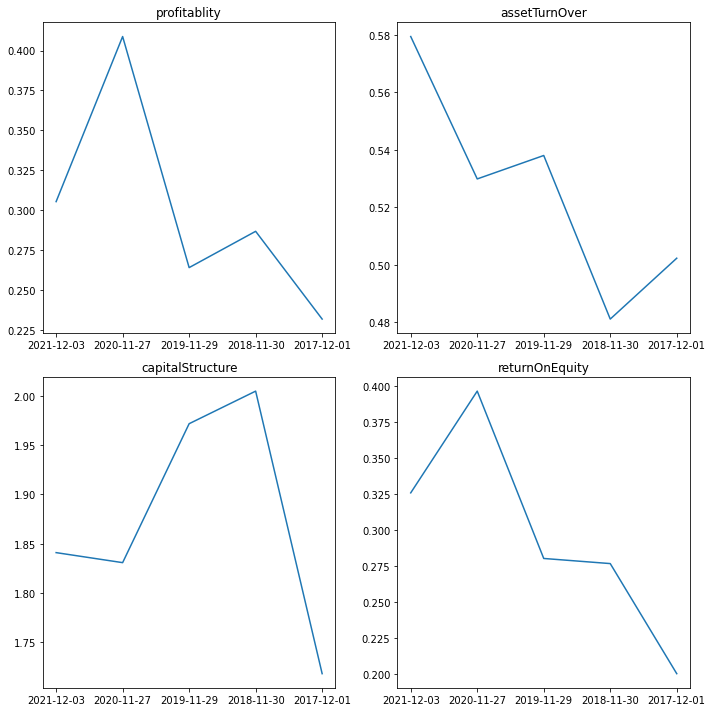

In [ ]:
fig, axs=plt.subplots(2,2,figsize=(10,10))

x=DuPontAnalysisdf['date']

values=['profitablity', 'assetTurnOver','capitalStructure','returnOnEquity']
print('DuPont Analysis')
for i in range(0,2):
  for j in range(0,2):
    valueIndex=i*2+j
    axs[i,j].plot(x,DuPontAnalysisdf[values[valueIndex]])
    axs[i,j].set_title(values[valueIndex])
    fig.tight_layout()
